<a href="https://colab.research.google.com/github/Facco-Bruno/Alura-Python/blob/Master/LR_inside.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(42)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/numpy-regressao/Aula1/dataset.csv', sep=';')

In [5]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [6]:
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


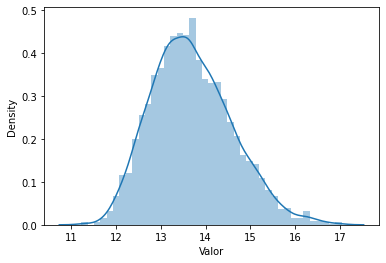

In [10]:
sns.distplot(valor)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


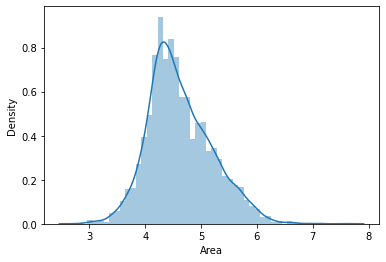

In [11]:
sns.distplot(area)

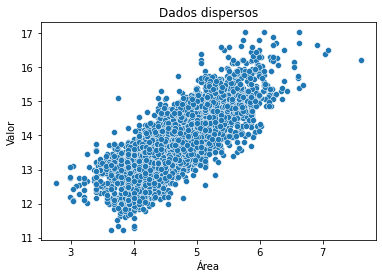

In [13]:
ax = sns.scatterplot(x=area, y=valor)

ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

In [14]:
def prever(theta0, theta1, x_i):
    return theta1*x_i + theta0 

In [15]:
def erro(theta0, theta1, x_i, y_i):
    return y_i - prever(theta0, theta1, x_i)

In [16]:
def soma_erro_quadratico_medio(previsto, y):
    return np.array([(y_i - y_previsto) ** 2 for y_previsto, y_i in zip(previsto,y)]).mean()

In [17]:
def minimos_quadrados(x, y):
    theta1 = np.corrcoef(x,y)[0,1] * y.std() / x.std()
    theta0 = y.mean() - theta1 * x.mean()
    return theta1, theta0

In [18]:
theta1, theta0 = minimos_quadrados(area, valor)

In [19]:
print(theta1)
print(theta0)

1.273136797389059
7.806465474455767


In [20]:
soma_erro_quadratico_medio(prever(theta0, theta1, area), valor)

0.2922746317391325

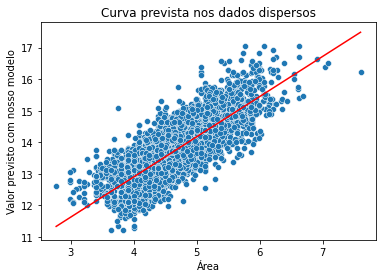

In [21]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = prever(theta0, theta1, area), color = 'red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

In [22]:
def r_2(y_previsto, y):
    
    variancia_prevista = sum([(y[i] - y_previsto[i]) ** 2 for i in range(len(y))])
    variancia_original = sum([(y[i] - y.mean()) ** 2 for i in range(len(y))])
    
    return 1 - variancia_prevista / variancia_original

In [23]:
r_2(prever(theta0, theta1, area), valor)

0.641975652487156

In [24]:
np.exp(prever(theta0, theta1, np.log(72)))

568778.569868878